<a href="https://colab.research.google.com/github/dguevaraapaza/Micobiome-Project/blob/main/Project_Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -q missingno
# !pip install -q pandas
# !pip install -q numpy
# !pip install -q matplotlib

In [2]:
import os
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option('display.max_rows', None)

In [3]:
# create metadata
# !wget -q -O hmp2_metadata_2018-08-20.csv https://g-227ca.190ebd.75bc.data.globus.org/ibdmdb/metadata/hmp2_metadata_2018-08-20.csv

# work on this
metadata = pd.read_csv('hmp2_metadata_2018-08-20.csv')
metadata.head()

/tmp/ipykernel_219689/2596019465.py:5: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('hmp2_metadata_2018-08-20.csv')


,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project,...,FecalCal received at MGH:,Proteomics received at LBNL:,Stool Sample ID: Tube A (EtOH),Sample ID: Tube B (No preservative),Tube A and B received at Broad:,stool_id,smoking status,Number years smoked,Age when started smoking,How many cigarettes/cigars/etc. do you smoke per day?
0,C3001CSC1_BP,206615,C3001,C3001CSC1,biopsy_16S,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
1,C3001CSC2_BP,206614,C3001,C3001CSC2,biopsy_16S,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
2,C3002CSC1_BP,206617,C3002,C3002CSC1,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
3,C3002CSC2_BP,206619,C3002,C3002CSC2,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
4,C3002CSC3_BP,206616,C3002,C3002CSC3,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


In [4]:
# export column labels
col_fixed = pd.DataFrame(
    {'old_names' : metadata.columns.tolist()}
)

# fix labels
col_fixed.to_csv("label_correction.csv", index=False)

In [5]:
# fix column headers
fixed = pd.read_csv("label_fixed.csv")
metadata.rename(columns=dict(zip(fixed.old_names, fixed.new_names)), 
                inplace=True)

In [6]:
# split based on data_type
sample_type = metadata.data_type.value_counts().index.tolist()
grouped = {group.data_type.unique()[0]: group for _, group in metadata.groupby('data_type')}
# 'stool_16S', 'biopsy_16S'

In [7]:
# Remove empty columns
# Iterate through each key-value pair in the dictionary
for data_type, group in grouped.items():
    print(f"Processing group: {data_type}")
    
    # trimming empty cols
    temp = group.isna().sum().to_frame('missing_values').reset_index().rename(columns={'index': 'cols'})
    display(temp.sort_values('missing_values', ascending=False).head())
    remove = temp.loc[temp['missing_values'] >= 100]
    remove = remove.cols.tolist()
    
    # Remove columns with missing values >= 100
    group_cleaned = group.drop(columns=remove)
    print(f"----------------------------------------")
    
    # Display the head of the cleaned group (optional)
    display(group_cleaned.head())
    
    # If you want to overwrite the dictionary with cleaned DataFrames
    grouped[data_type] = group_cleaned

Processing group: biopsy_16S


,cols,missing_values
245,immune_diseases,178
292,not_anti_TNF_inhibitor,178
330,levaquin_stopping_reason,178
329,levaquin,178
328,xifaxin_stopping_reason,178


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,week_num,visit_num,research_project,intervalname,intervalsequence,...,left_colon_3,rectum_3,total_3,ses_cd_score,partial_endoscopy_1,sex,viromics_Baylor,fecalcal_MGH,proteomics_LBNL,tube_AB_received_Broad
0,C3001CSC1_BP,206615,C3001,C3001CSC1,biopsy_16S,2.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
1,C3001CSC2_BP,206614,C3001,C3001CSC2,biopsy_16S,2.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
2,C3002CSC1_BP,206617,C3002,C3002CSC1,biopsy_16S,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
3,C3002CSC2_BP,206619,C3002,C3002CSC2,biopsy_16S,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
4,C3002CSC3_BP,206616,C3002,C3002CSC3,biopsy_16S,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No


Processing group: host_genome


,cols,missing_values
177,extent,92
456,ses_cd_score,92
449,total_2,92
448,rectum_2,92
447,left_colon_2,92


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,research_project,...,fecalcal_MGH,proteomics_LBNL,stool_sample_id_tube_A,sample_id_tube_B,tube_AB_received_Broad,stool_id,smoking_status,years_smoked,age_started_smoking,cigarettes_per_day
178,C3001CFU6_HG,CSM5FZ16,C3001,C3001CFU6,host_genome,NaN,NaN,NaN,17,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
179,C3002CFU12_HG,CSM71HOP,C3002,C3002CFU12,host_genome,NaN,NaN,NaN,31,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
180,C3003CFU12_HG,CSM71HOX,C3003,C3003CFU12,host_genome,NaN,NaN,NaN,31,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
181,C3005CFU3_HG,CSM5FZ14,C3005,C3005CFU3,host_genome,NaN,NaN,NaN,10,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
182,C3006CFU3_HG,CSM5FZ17,C3006,C3006CFU3,host_genome,NaN,NaN,NaN,10,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


Processing group: host_transcriptomics


,cols,missing_values
245,immune_diseases,252
291,recent_diagnosis,252
329,levaquin,252
328,xifaxin_stopping_reason,252
327,xifaxin,252


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,week_num,visit_num,research_project,intervalname,intervalsequence,...,left_colon_3,rectum_3,total_3,ses_cd_score,partial_endoscopy_1,sex,viromics_Baylor,fecalcal_MGH,proteomics_LBNL,tube_AB_received_Broad
270,C3002CSC1_TX,CSM5FZ1G,C3002,C3002CSC1,host_transcriptomics,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
271,C3002CSC2_TX,CSM5FZ1F,C3002,C3002CSC2,host_transcriptomics,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
272,C3002CSC3_TX,CSM5FZ1I,C3002,C3002CSC3,host_transcriptomics,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
273,C3002CSC4_TX,CSM5FZ1H,C3002,C3002CSC4,host_transcriptomics,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
274,C3003CSC1_TX,CSM5FZ1J,C3003,C3003CSC1,host_transcriptomics,1.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No


Processing group: metabolomics


,cols,missing_values
245,immune_diseases,546
314,behavior_B,546
336,entocort,546
335,prednisone_highest_dose,546
334,prednisone_stopping_reason,546


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,research_project,...,sex,stool_sample_collected,tube_A_metabolomics,tube_B_proteomics,viromics_Baylor,fecalcal_MGH,proteomics_LBNL,stool_sample_id_tube_A,sample_id_tube_B,tube_AB_received_Broad
522,C3001C1_MBX,CSM5FZ3N,C3001,C3001C1,metabolomics,0.0,2014-03-14,0.0,4,ibdmdb,...,Female,Yes,SM-5QVZD,SM-5QVZJ,No,No,No,SM-5FZ3N,SM-5FZ3P,No
523,C3001C5_MBX,CSM5FZ4C,C3001,C3001C5,metabolomics,8.0,2014-05-09,11.0,8,ibdmdb,...,Female,Yes,SM-64NA9,SM-64NAD,No,No,No,SM-5FZ4C,SM-5FZ4D,Yes
524,C3001C9_MBX,CSM5MCVV,C3001,C3001C9,metabolomics,16.0,2014-07-10,15.0,13,ibdmdb,...,Female,Yes,SM-6MYZ2,SM-6N1G7,No,No,No,SM-5MCVV,SM-5MCVW,No
525,C3001C15_MBX,CSM67UA2,C3001,C3001C15,metabolomics,28.0,2014-09-30,13.0,20,ibdmdb,...,Female,Yes,SM-71WY2,SM-71T4J,No,No,No,SM-67UA2,SM-67UA3,No
526,C3001C20_MBX,CSM79HGP,C3001,C3001C20,metabolomics,38.0,2014-12-10,15.0,26,ibdmdb,...,Female,Yes,SM-7CRX2,SM-7CS47,No,No,No,SM-79HGP,SM-79HGQ,No


Processing group: metagenomics


,cols,missing_values
245,immune_diseases,1638
314,behavior_B,1638
336,entocort,1638
335,prednisone_highest_dose,1638
334,prednisone_stopping_reason,1638


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,research_project,...,uveitis_1,partial_endoscopy_1,sex,stool_sample_collected,viromics_Baylor,fecalcal_MGH,proteomics_LBNL,stool_sample_id_tube_A,sample_id_tube_B,tube_AB_received_Broad
1068,G79889,CSM5FZ3N_P,C3001,C3001C1,metagenomics,0.0,2014-03-14,0.0,4,ibdmdb,...,No,No,Female,Yes,No,No,No,SM-5FZ3N,SM-5FZ3P,No
1069,G79894,CSM5FZ3R_P,C3001,C3001C2,metagenomics,2.0,2014-03-28,14.0,5,ibdmdb,...,No,No,Female,Yes,No,No,No,SM-5FZ3R,SM-5UJBB,Yes
1070,G79903,CSM5YRY7_P,C3001,C3001C3,metagenomics,4.0,2014-04-15,18.0,6,ibdmdb,...,No,No,Female,Yes,No,No,No,SM-5YRY7,SM-5YRY8,Yes
1071,G79913,CSM5FZ3V_P,C3001,C3001C4,metagenomics,6.0,2014-04-28,13.0,7,ibdmdb,...,No,No,Female,Yes,No,No,No,SM-5FZ3V,SM-5FZ3W,Yes
1072,G79926,CSM5FZ4C_P,C3001,C3001C5,metagenomics,8.0,2014-05-09,11.0,8,ibdmdb,...,No,No,Female,Yes,No,No,No,SM-5FZ4C,SM-5FZ4D,Yes


Processing group: metatranscriptomics


,cols,missing_values
245,immune_diseases,835
314,behavior_B,835
336,entocort,835
335,prednisone_highest_dose,835
334,prednisone_stopping_reason,835


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,research_project,...,sex,stool_sample_collected,tube_A_metabolomics,tube_B_proteomics,viromics_Baylor,fecalcal_MGH,proteomics_LBNL,stool_sample_id_tube_A,sample_id_tube_B,tube_AB_received_Broad
2706,G89308,CSM5FZ4C_P,C3001,C3001C5,metatranscriptomics,8.0,2014-05-09,11.0,8,ibdmdb,...,Female,Yes,SM-64NA9,SM-64NAD,No,No,No,SM-5FZ4C,SM-5FZ4D,Yes
2707,G89338,CSM5MCVV_P,C3001,C3001C9,metatranscriptomics,16.0,2014-07-10,15.0,13,ibdmdb,...,Female,Yes,SM-6MYZ2,SM-6N1G7,No,No,No,SM-5MCVV,SM-5MCVW,No
2708,G89370,CSM5MCWI_P,C3001,C3001C10,metatranscriptomics,18.0,2014-07-22,12.0,14,ibdmdb,...,Female,Yes,SM-6QU1O,SM-6QU53,No,No,No,SM-5MCWI,SM-5MCWJ,No
2709,C3001C11_MTX,CSM5MCXD,C3001,C3001C11,metatranscriptomics,20.0,2014-08-05,14.0,15,ibdmdb,...,Female,Yes,SM-6UG7A,SM-6UG7S,No,No,No,SM-5MCXD,SM-5MCXE,No
2710,C3001C15_MTX,CSM67UA2,C3001,C3001C15,metatranscriptomics,28.0,2014-09-30,13.0,20,ibdmdb,...,Female,Yes,SM-71WY2,SM-71T4J,No,No,No,SM-67UA2,SM-67UA3,No


Processing group: methylome


,cols,missing_values
169,acute_gi_infection,449
356,FOS_stopping_reason,449
472,tube_A_DNA_RNA,449
37,ffq_yaq_results,449
369,tysabri_stopping_reason,449


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,visit_num,research_project,intervalname,intervalsequence,projectspecificid,...,arthralgias,pyoderma_gangrenosum_1,erythema_nodosum_1,uveitis_1,partial_endoscopy_1,sex,viromics_Baylor,fecalcal_MGH,proteomics_LBNL,tube_AB_received_Broad
3541,C3001CFU3_RRBS,CSM5FYZV,C3001,C3001CFU3,methylome,10,ibdmdb,Follow-up (Month 3),10,3001,...,No,No,No,No,No,Female,No,No,No,No
3542,C3001CFU9_RRBS,CSM71HOA,C3001,C3001CFU9,methylome,24,ibdmdb,Follow-up (Month 9),24,3001,...,No,No,No,No,No,Female,No,No,No,No
3543,C3002CSC1_RRBS,CSM5FZ1F,C3002,C3002CSC1,methylome,1,ibdmdb,Screening Colonoscopy,1,3002,...,No,No,No,No,No,Female,No,No,No,No
3544,C3002CSC2_RRBS,CSM5FZ1G,C3002,C3002CSC2,methylome,1,ibdmdb,Screening Colonoscopy,1,3002,...,No,No,No,No,No,Female,No,No,No,No
3545,C3002CSC3_RRBS,CSM5FZ1I,C3002,C3002CSC3,methylome,1,ibdmdb,Screening Colonoscopy,1,3002,...,No,No,No,No,No,Female,No,No,No,No


Processing group: proteomics


,cols,missing_values
245,immune_diseases,450
314,behavior_B,450
336,entocort,450
335,prednisone_highest_dose,450
334,prednisone_stopping_reason,450


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,research_project,...,stool_sample_collected,tube_B_fecal_calprotectin,fecalcal,tube_B_proteomics,viromics_Baylor,fecalcal_MGH,proteomics_LBNL,stool_sample_id_tube_A,sample_id_tube_B,tube_AB_received_Broad
3990,1357122,CSM5FZ3N,C3001,C3001C1,proteomics,0.0,2014-03-14,0.0,4,ibdmdb,...,Yes,SM-5QVZI,193.8900,SM-5QVZJ,No,No,No,SM-5FZ3N,SM-5FZ3P,No
3991,1356873,CSM5FZ4C,C3001,C3001C5,proteomics,8.0,2014-05-09,11.0,8,ibdmdb,...,Yes,SM-64NAC,61.3400,SM-64NAD,No,No,No,SM-5FZ4C,SM-5FZ4D,Yes
3992,1357104,CSM5MCVV,C3001,C3001C9,proteomics,16.0,2014-07-10,15.0,13,ibdmdb,...,Yes,SM-6N1G6,115.2700,SM-6N1G7,No,No,No,SM-5MCVV,SM-5MCVW,No
3993,1364189,CSM67UA2,C3001,C3001C15,proteomics,28.0,2014-09-30,13.0,20,ibdmdb,...,Yes,SM-71T4I,23.2035,SM-71T4J,No,No,No,SM-67UA2,SM-67UA3,No
3994,1356234,CSM79HMZ,C3001,C3001C24,proteomics,46.0,2015-02-03,14.0,30,ibdmdb,...,Yes,SM-7IL2N,48.9000,SM-7IL2O,No,No,No,SM-79HMZ,SM-79HN1,No


Processing group: serology


,cols,missing_values
352,mercaptopurine_stopping_reason,210
65,rectum_dna_rna,210
431,screening_status,210
419,C1_kit_sample,210
418,GI_imaging_procedures,210


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,week_num,visit_num,research_project,intervalname,intervalsequence,...,arthralgias,pyoderma_gangrenosum_1,erythema_nodosum_1,uveitis_1,partial_endoscopy_1,sex,viromics_Baylor,fecalcal_MGH,proteomics_LBNL,tube_AB_received_Broad
4440,E5004CBL1_SER,206516,E5004,E5004CBL1,serology,-1.0,3,ibdmdb,Baseline (IBD and Healthy),3,...,No,No,No,No,No,Female,No,No,No,No
4441,E5004CFU3_SER,206527,E5004,E5004CFU3,serology,15.0,10,ibdmdb,Follow-up (Month 3),10,...,No,No,No,No,No,Female,No,No,No,No
4442,E5004CFU6_SER,219972,E5004,E5004CFU6,serology,29.0,17,ibdmdb,Follow-Up (Month 6),17,...,No,No,No,No,No,Female,No,No,No,No
4443,E5009CBL1_SER,206529,E5009,E5009CBL1,serology,8.0,3,ibdmdb,Baseline (IBD and Healthy),3,...,No,No,No,No,No,Female,No,No,No,No
4444,E5013CBL1_SER,206528,E5013,E5013CBL1,serology,0.0,3,ibdmdb,Baseline (IBD and Healthy),3,...,No,No,No,No,No,Female,No,No,No,No


Processing group: stool_16S


,cols,missing_values
245,immune_diseases,180
338,entocort_highest_dose,180
336,entocort,180
335,prednisone_highest_dose,180
334,prednisone_stopping_reason,180


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,research_project,...,tube_A_viromics,tube_B_fecal_calprotectin,fecalcal,tube_B_proteomics,viromics_Baylor,fecalcal_MGH,proteomics_LBNL,stool_sample_id_tube_A,sample_id_tube_B,tube_AB_received_Broad
4650,G79084,CSM5FZ3N,C3001,C3001C1,stool_16S,0.0,2014-03-14,0.0,4,ibdmdb,...,SM-5QVZE,SM-5QVZI,193.89,SM-5QVZJ,No,No,No,SM-5FZ3N,SM-5FZ3P,No
4651,G79089,CSM5FZ3R,C3001,C3001C2,stool_16S,2.0,2014-03-28,14.0,5,ibdmdb,...,SM-5UKLB,SM-5UJNM,133.01,SM-5UJNN,No,No,No,SM-5FZ3R,SM-5UJBB,Yes
4652,G79098,CSM5YRY7,C3001,C3001C3,stool_16S,4.0,2014-04-15,18.0,6,ibdmdb,...,SM-5YSLQ,SM-5YSLS,198.84,SM-5YSLT,No,No,No,SM-5YRY7,SM-5YRY8,Yes
4653,G79108,CSM5FZ3V,C3001,C3001C4,stool_16S,6.0,2014-04-28,13.0,7,ibdmdb,...,SM-61GG5,SM-61GG7,46.86,SM-61GG8,No,No,No,SM-5FZ3V,SM-5FZ3W,Yes
4654,G79121,CSM5FZ4C,C3001,C3001C5,stool_16S,8.0,2014-05-09,11.0,8,ibdmdb,...,SM-64NAA,SM-64NAC,61.34,SM-64NAD,No,No,No,SM-5FZ4C,SM-5FZ4D,Yes


Processing group: viromics


,cols,missing_values
245,immune_diseases,703
314,behavior_B,703
336,entocort,703
335,prednisone_highest_dose,703
334,prednisone_stopping_reason,703


----------------------------------------


,project,external_id,participant_id,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,research_project,...,stool_sample_collected,tube_A_metabolomics,tube_A_viromics,tube_B_proteomics,viromics_Baylor,fecalcal_MGH,proteomics_LBNL,stool_sample_id_tube_A,sample_id_tube_B,tube_AB_received_Broad
4830,C3001C11_MVX,CSM5MCXD,C3001,C3001C11,viromics,20.0,2014-08-05,14.0,15,ibdmdb,...,Yes,SM-6UG7A,SM-6UG79,SM-6UG7S,No,No,No,SM-5MCXD,SM-5MCXE,No
4831,C3001C15_MVX,CSM67UA2,C3001,C3001C15,viromics,28.0,2014-09-30,13.0,20,ibdmdb,...,Yes,SM-71WY2,SM-71WY3,SM-71T4J,No,No,No,SM-67UA2,SM-67UA3,No
4832,C3001C20_MVX,CSM79HGP,C3001,C3001C20,viromics,38.0,2014-12-10,15.0,26,ibdmdb,...,Yes,SM-7CRX2,SM-7CRX4,SM-7CS47,No,No,No,SM-79HGP,SM-79HGQ,No
4833,C3002C9_MVX,CSM5MCVN,C3002,C3002C9,viromics,16.0,2014-08-19,13.0,13,ibdmdb,...,Yes,SM-6X9WU,SM-6X9WV,SM-6X8VC,No,No,No,SM-5MCVN,SM-5MCVO,No
4834,C3002C14_MVX,CSM67UBH,C3002,C3002C14,viromics,26.0,2014-10-28,13.0,19,ibdmdb,...,Yes,SM-76CAT,SM-76CAU,SM-76CCH,No,No,No,SM-67UBH,SM-67UBI,No


## 1. Biopsy

(178, 138)


<Axes: >

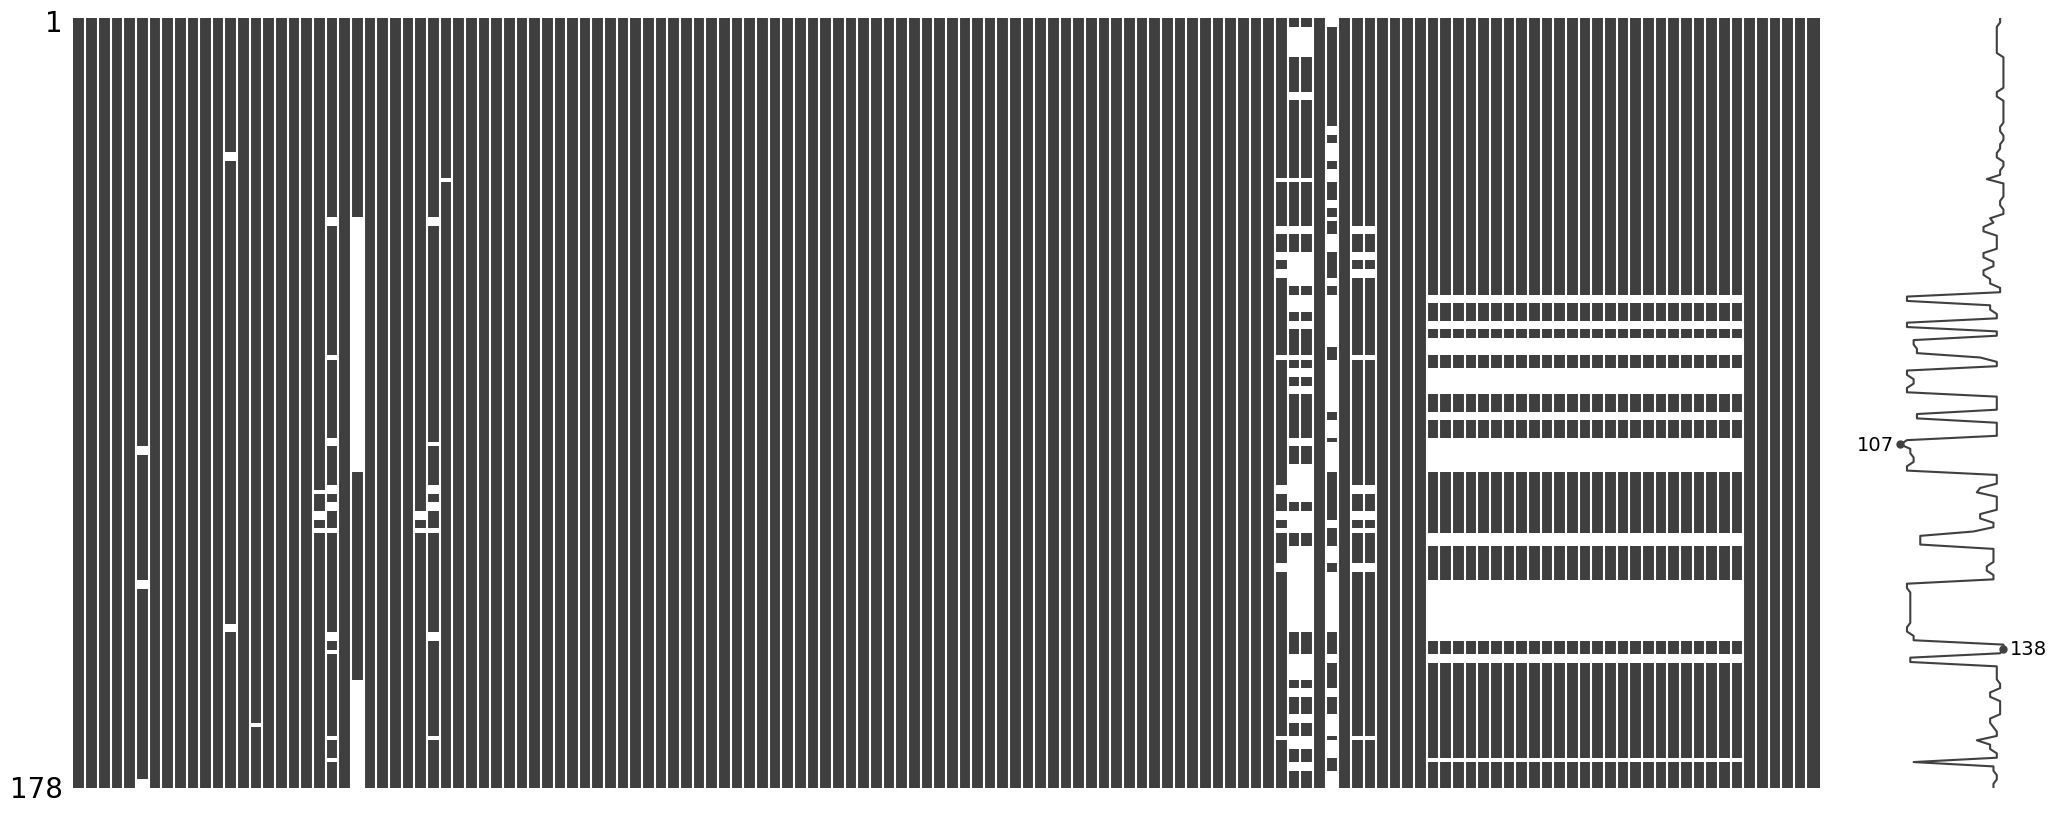

In [ ]:
# biopsy_16S
biopsy_16S = grouped['biopsy_16S']
print(biopsy_16S.shape)

# missing matrix
msno.matrix(biopsy_16S)
plt.show()

## 2. Stools

(180, 142)


<Axes: >

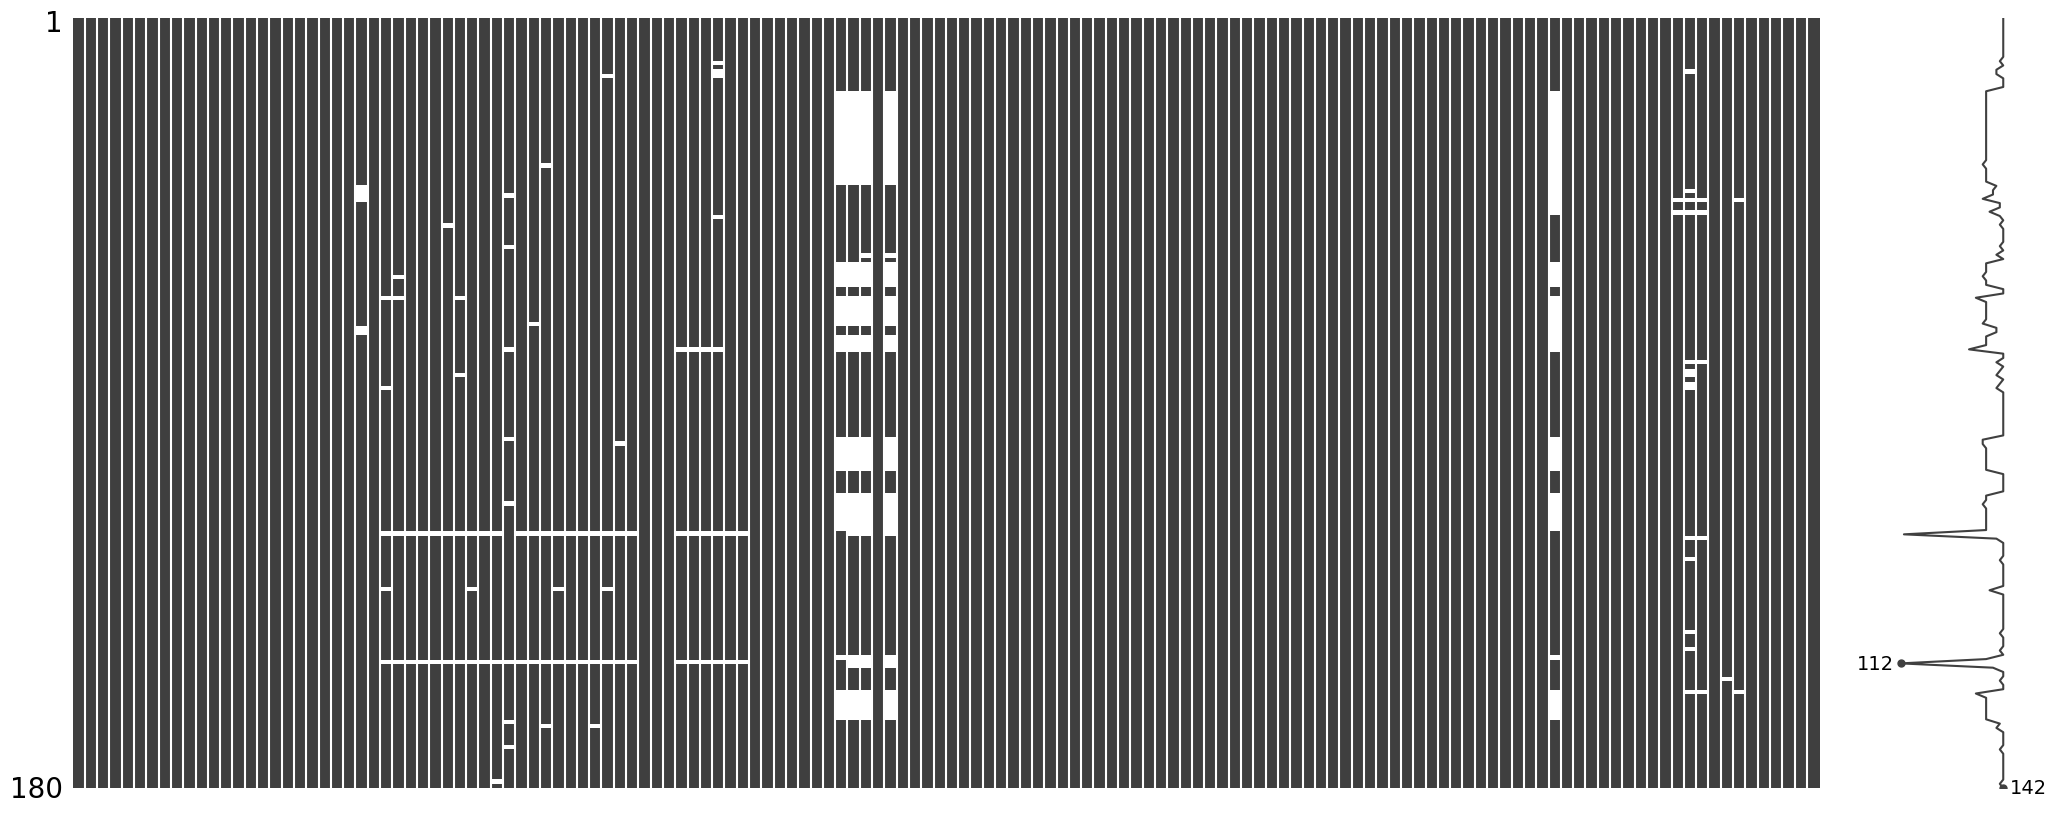

In [ ]:
# biopsy_16S
stool_16S = grouped['stool_16S']
print(stool_16S.shape)

# missing matrix
msno.matrix(stool_16S)
plt.show()

## 3. Reviewing 16S

In [ ]:
# Elements in biopsy_16S but not in stool_16S
diff1 = set(biopsy_16S.columns) - set(stool_16S.columns)
diff1

{'C1_kit_sample',
 'CRP',
 'ESR',
 'GI_imaging_procedures',
 'baron_score_completed',
 'biopsy_location',
 'dna_rna_tubes_collected',
 'epithelial_cell_biopsies',
 'flora_tubes_collected',
 'histopathology_samples',
 'ileum',
 'ileum_1',
 'ileum_2',
 'ileum_3',
 'ileum_dna_rna',
 'ileum_flora',
 'is_inflamed',
 'labs_within_2_weeks',
 'left_colon',
 'left_colon_1',
 'left_colon_2',
 'left_colon_3',
 'rectum',
 'rectum_1',
 'rectum_2',
 'rectum_3',
 'rectum_dna_rna',
 'rectum_flora',
 'right_colon',
 'right_colon_1',
 'right_colon_2',
 'right_colon_3',
 'ses_cd_score',
 'total',
 'total_1',
 'total_2',
 'total_3',
 'transverse_colon',
 'transverse_colon_1',
 'transverse_colon_2',
 'transverse_colon_3'}

In [18]:
diff2 = set(stool_16S.columns) -  set(biopsy_16S.columns)
diff2

{'alcohol',
 'baseline_montreal_location',
 'beans',
 'bowel_surgery',
 'colonoscopy_procedure',
 'dairy',
 'date_of_receipt',
 'diarrhea',
 'diet_soft_drinks',
 'eggs',
 'fecalcal',
 'fish',
 'fruit_juice',
 'fruits_no_juice',
 'general_wellbeing',
 'hbi',
 'hbi_completed',
 'hospitalization',
 'interval_days',
 'liquid_stools',
 'medications_received',
 'oral_contrast',
 'pdo_number',
 'probiotic',
 'processed_meat',
 'red_meat',
 'sample_id_tube_B',
 'shellfish',
 'soft_drinks',
 'starch',
 'stool_sample_collected',
 'stool_sample_id_tube_A',
 'sweets',
 'tea_coffee',
 'tube_A_DNA_RNA',
 'tube_A_metabolomics',
 'tube_A_storage',
 'tube_A_viromics',
 'tube_B_fecal_calprotectin',
 'tube_B_proteomics',
 'vegetables',
 'water',
 'white_meat',
 'whole_grains',
 'yogurt_bacterial_cultures'}

In [10]:
# # check integrity per data type (collection)
# print('Data Type View----------------------')
# gb = metadata.groupby('data_type')
# print(metadata.data_type.unique())
# metad = [gb.get_group(x) for x in gb.groups]
# print('------------------------------------')
# print(metadata['data_type'].value_counts())